In [1]:
from pylab import *
from classy import *

Version:  0.0.68


## Loading the data, converting to vectors

In [2]:
images=image.load_images('images/digits')

[eight]: 174 files found
[nine]: 180 files found
[three]: 183 files found
[one]: 182 files found
[zero]: 178 files found
[seven]: 179 files found
[two]: 177 files found
[six]: 181 files found
[five]: 182 files found
[four]: 181 files found


In [4]:
images=image.load_images('digits.zip/digits')

[zero]: 178 files found
[eight]: 174 files found
[two]: 177 files found
[four]: 181 files found
[three]: 183 files found
[nine]: 180 files found
[six]: 181 files found
[seven]: 179 files found
[five]: 182 files found
[one]: 182 files found


In [8]:
images.keys()

dict_keys(['DESCR', 'files', 'data', 'targets', 'target_names'])

In [9]:
len(images.data)

1797

In [5]:
im=images.data[1500]
im.shape

(4, 4)

In [16]:
images.targets[1500]

8

In [18]:
images.target_names[8]

'five'

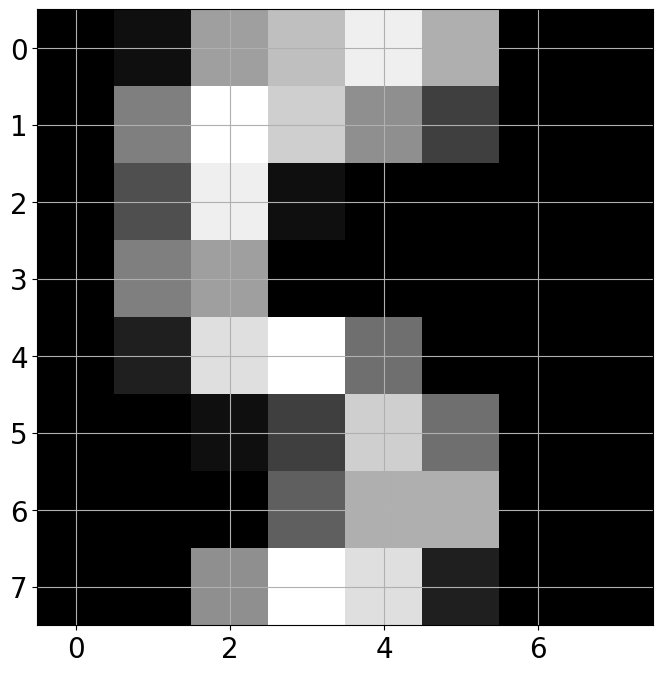

In [19]:
imshow(im,cmap=cm.gray)

In [20]:
data=image.images_to_vectors(images)

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: 'eight', 'nine', 'three', 'one', 'zero', 'seven', 'two', 'six', 'five', 'four'
Mean:  [0.00000000e+00 4.71341124e+00 8.25158598e+01 1.88401224e+02
 1.88589872e+02 9.17840846e+01 2.15581525e+01 2.04785754e+00
 8.51419032e-02 3.14913745e+01 1.65203116e+02 1.90677240e+02
 1.63504174e+02 1.30023372e+02 2.92036728e+01 1.70005565e+00
 4.22927101e-02 4.11185309e+01 1.57575960e+02 1.11080690e+02
 1.12814691e+02 1.24173066e+02 2.82609905e+01 7.82971619e-01
 1.66944908e-02 3.90011130e+01 1.44642181e+02 1.40286589e+02
 1.58007791e+02 1.20022816e+02 3.66889260e+01 3.33889816e-02
 0.00000000e+00 3.70083472e+01 1.21928770e+02 1.44347245e+02
 1.63978854e+02 1.39081803e+02 4.60222593e+01 0.00000000e+00
 1.37451308e-01 2.49860879e+01 1.09460768e+02 1.14961046e+02
 1.21993879e+02 1.30974958e+02 5.47762938e+01 4.24040067e-01
 1.13522538e-01 1.

In [21]:
data.targets

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [22]:
data.target_names

['eight',
 'nine',
 'three',
 'one',
 'zero',
 'seven',
 'two',
 'six',
 'five',
 'four']

In [23]:
data_train,data_test=split(data)

Original vector shape:  (1797, 64)
Train vector shape:  (1347, 64)
Test vector shape:  (450, 64)


## Classify the vectors

In [27]:
C=NaiveBayes()
C.fit(data_train.vectors,data_train.targets)
print("On train: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On test: ",C.percent_correct(data_test.vectors,data_test.targets))
      

On train:  93.0957683741648
On test:  92.22222222222223


In [29]:
C.means.shape

(10, 64)

### Visualize the internals of the classifier

In [31]:
which_category=0
prototype=C.means[which_category,:]
category_name=data.target_names[which_category]
prototype.shape

(64,)

Text(0.5, 1.0, 'eight')

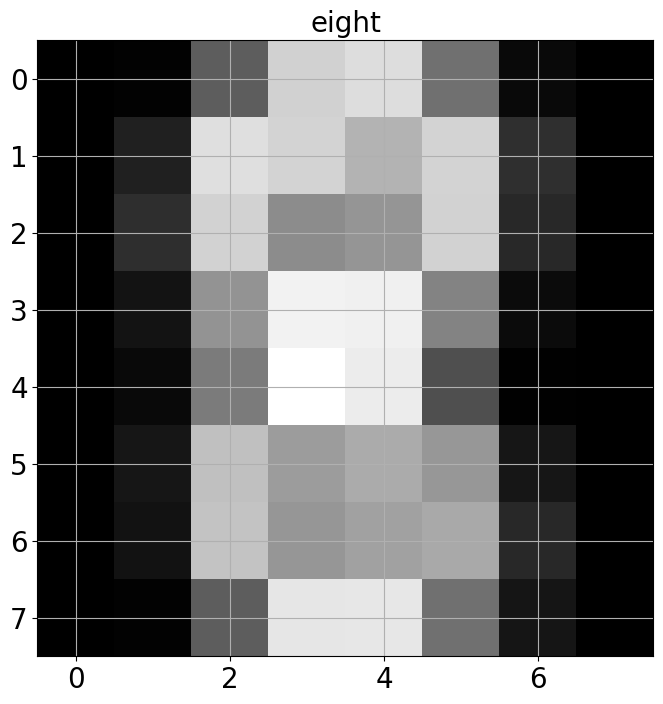

In [32]:
prototype=prototype.reshape(8,8)
imshow(prototype,cmap=cm.gray)
title(category_name)

In [33]:
which_category=4
prototype=C.means[which_category,:]
category_name=data.target_names[which_category]
prototype.shape

(64,)

Text(0.5, 1.0, 'zero')

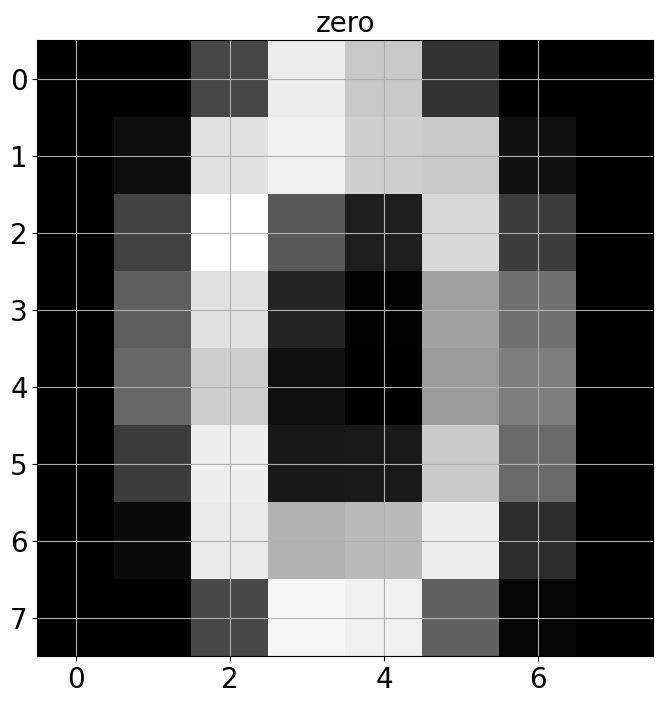

In [34]:
prototype=prototype.reshape(8,8)
imshow(prototype,cmap=cm.gray)
title(category_name)

In [35]:
C=kNearestNeighbor(k=5)
C.fit(data_train.vectors,data_train.targets)
print("On train: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On test: ",C.percent_correct(data_test.vectors,data_test.targets))
      

On train:  99.10913140311804
On test:  98.22222222222223


In [40]:
C=CSC()
C.fit(data_train.vectors,data_train.targets)
print("On train: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On test: ",C.percent_correct(data_test.vectors,data_test.targets))
      

On train:  100.0
On test:  97.11111111111111


### Visualize the internals of the classifier

In [41]:
C.centers

array([[  0.,   0., 127., ..., 159.,   0.,   0.],
       [  0.,   0.,   0., ..., 239.,  79.,   0.],
       [  0.,  47., 239., ..., 191., 175.,  15.],
       ...,
       [  0.,   0., 127., ..., 255., 175.,  15.],
       [  0.,   0.,  15., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., 175.,   0.,   0.]])

In [42]:
C.centers.shape

(171, 64)

In [43]:
C.targets

array([1, 3, 6, 7, 8, 5, 7, 0, 6, 1, 9, 9, 8, 2, 8, 7, 0, 3, 3, 4, 7, 2,
       8, 9, 9, 0, 1, 6, 0, 6, 0, 0, 5, 1, 5, 0, 1, 3, 6, 8, 0, 0, 8, 7,
       8, 4, 1, 3, 5, 1, 0, 3, 6, 0, 5, 6, 0, 5, 8, 3, 2, 6, 1, 8, 2, 9,
       0, 8, 8, 3, 1, 4, 1, 6, 3, 7, 2, 8, 9, 9, 0, 3, 5, 8, 8, 5, 5, 3,
       1, 6, 7, 5, 5, 9, 5, 9, 1, 9, 1, 0, 3, 5, 2, 8, 1, 3, 3, 2, 8, 2,
       5, 0, 1, 3, 1, 2, 0, 2, 6, 8, 1, 4, 3, 1, 7, 3, 2, 7, 0, 1, 1, 2,
       7, 1, 8, 1, 2, 2, 0, 9, 8, 1, 1, 1, 8, 2, 9, 5, 9, 2, 5, 2, 8, 9,
       2, 2, 0, 1, 2, 2, 2, 0, 9, 1, 0, 3, 0, 0, 1, 3, 0])

In [44]:
which_center=4
prototype=C.centers[which_center,:]
category_name=data.target_names[C.targets[which_center]]
prototype.shape

(64,)

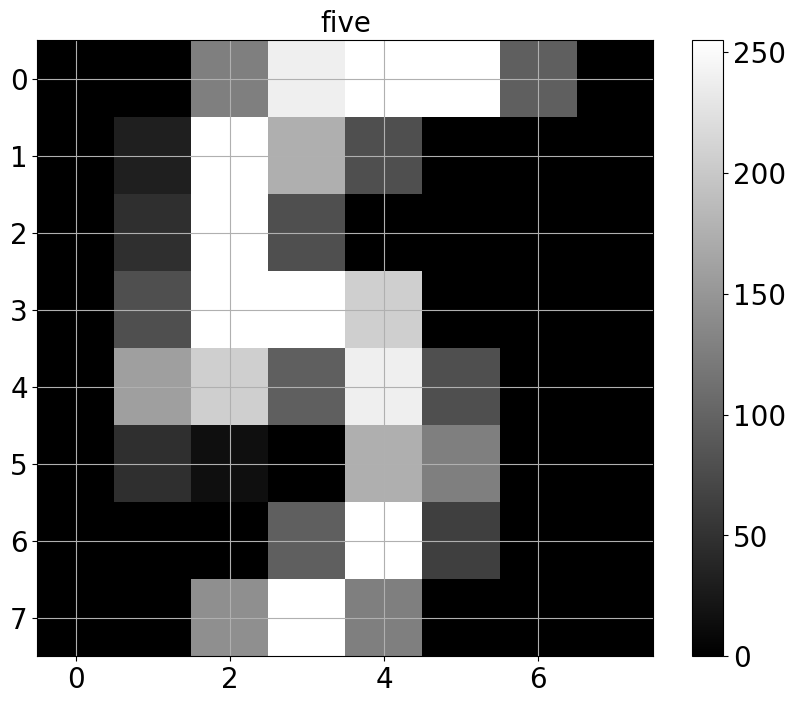

In [85]:
prototype=prototype.reshape(8,8)
imshow(prototype,cmap=cm.gray)
title(category_name)
colorbar()

## make a prediction

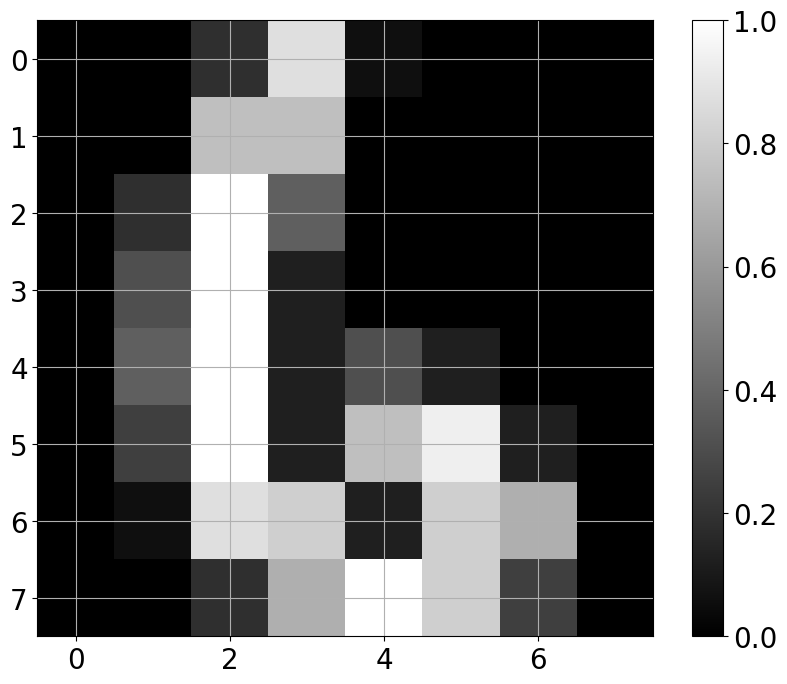

In [86]:
new_image=imread('images/digits/six/1734.png')
imshow(new_image,cmap=cm.gray)
colorbar()

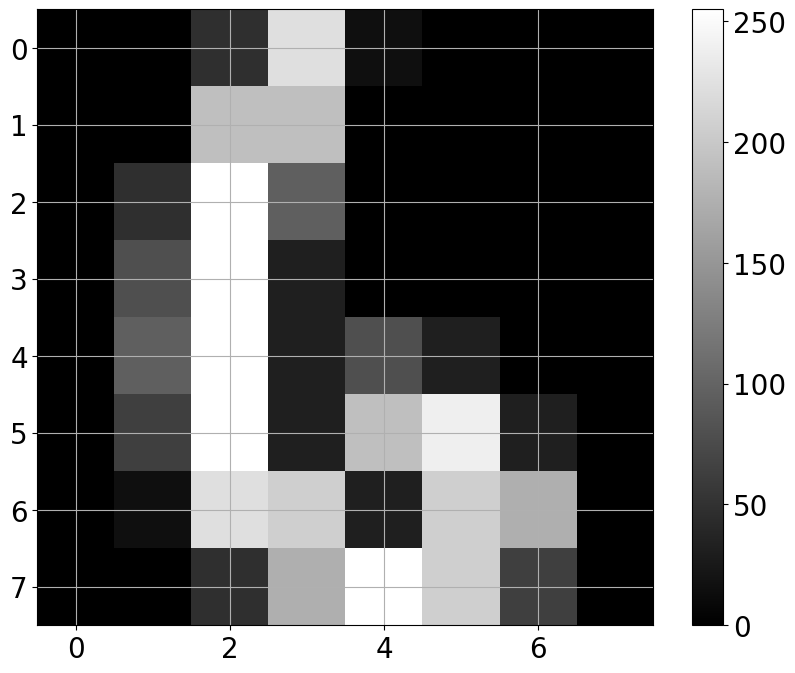

In [87]:
new_image=imread('images/digits/six/1734.png')
new_image=new_image*255
imshow(new_image,cmap=cm.gray)
colorbar()

In [88]:
new_image.shape

(8, 8)

In [89]:
new_vector=new_image.reshape(1,64)
new_vector.shape

(1, 64)

In [90]:
C.predict(new_vector)[0]

7

In [91]:
data.target_names[C.predict(new_vector)[0]]

'six'